This notebook builds a binary classification model to classify movie reviews. It uses IMDB dataset that contains 50,000 movie reviews. The dataset is split into a training set (containng 25,000 data) and a test set (containing 25,000 data). The training data set will be further divided to a validation set of 10,000 data.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [3]:
# import the imdb data set
from keras.datasets import imdb
# split the dataset into training and test data set
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 22s 1us/step


In [7]:
# data in the data set are the movie reviews converted to integer stings of length 10000. 
# Where each integer represents a particular word
# first trining data
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
# corresponding label 1 = positive review, 0 = negative review
train_labels[0]

1

In [12]:
# converting the integer vector to text
# word_index is a map of words to integers
word_index = imdb.get_word_index()
# reverse the word_index: map integers to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decode the review. offset first 3 words that are reserved for padding, start of sequence and unknown
# decode the first training data
decode_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [13]:
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [15]:
# data preparation
# convert integers in the data to 10,000-dimensional binary vector (contaiing 1s in the integer position 
#0 elsewhere )
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    # a matrix of all zeros with dimension (len(sequences, dimension))
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [16]:
# vectorized 10,000-dimension training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [17]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
x_train[0].shape

(10000,)

In [20]:
# vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [21]:
y_train[0]

1.0

In [24]:
# build the binary classification model
"""
N.B. after upgrading to Tensorflow 2.0, using keras (e.g., from keras import models) throws an error
'AttributeError: module 'tensorflow' has no attribute 'get_default_graph'. To avoid this use 
from tensorflow.keras iport models etc.
"""
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [25]:
# build the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
# validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data= (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 312us/sample - loss: 0.5389 - accuracy: 0.7703 - val_loss: 0.4158 - val_accuracy: 0.8556
Epoch 2/20
15000/15000 [==============================] - 2s 157us/sample - loss: 0.3285 - accuracy: 0.9007 - val_loss: 0.3205 - val_accuracy: 0.8832
Epoch 3/20
15000/15000 [==============================] - 7s 494us/sample - loss: 0.2375 - accuracy: 0.9245 - val_loss: 0.2825 - val_accuracy: 0.8915
Epoch 4/20
15000/15000 [==============================] - 2s 148us/sample - loss: 0.1875 - accuracy: 0.9394 - val_loss: 0.2792 - val_accuracy: 0.8895
Epoch 5/20
15000/15000 [==============================] - 2s 149us/sample - loss: 0.1486 - accuracy: 0.9527 - val_loss: 0.3064 - val_accuracy: 0.8796
Epoch 6/20
15000/15000 [==============================] - 2s 154us/sample - loss: 0.1238 - accuracy: 0.9627 - val_loss: 0.2897 - val_accuracy: 0.8855
Epoch 7/20
15000/15000 [==========================

In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [31]:
# training and validation accuracy and loss
train_loss = history_dict['loss']
train_acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

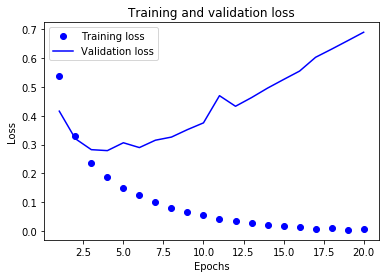

In [33]:
epochs = range (1, len(train_acc) + 1)
# plot training and validation loss
import matplotlib.pyplot as plt
# show plots in line
%matplotlib inline

# loss plot
plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

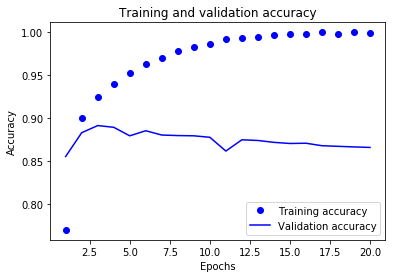

In [34]:
# accuracy plot
plt.plot(epochs, train_acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()